## Data Segregation

In [ ]:
import h5py #type: ignore
import pandas as pd #type: ignore
import numpy as np #type:ignore


#### Load Data

In [ ]:
path = '/zenodo_data/exams_extracted/'

# path = '/home/pingal/Documents/ECG_data/'
filename = path + 'exams.csv'
df = pd.read_csv(filename)

print("First few rows of the CSV file:")
print(df.head())



#### Exam ID

In [ ]:
code_1dAVb = []
code_RBBB = []
code_LBBB = []
code_SB = []
code_ST = []
code_AF = []
code_normal = []
for index in range(df.shape[0]):
    if df['1dAVb'][index] == True:
        code_1dAVb.append(df['exam_id'][index])
    if df['RBBB'][index] == True:
        code_RBBB.append(df['exam_id'][index])
    if df['LBBB'][index] == True:
        code_LBBB.append(df['exam_id'][index])
    if df['SB'][index] == True:
        code_SB.append(df['exam_id'][index])
    if df['ST'][index] == True:
        code_ST.append(df['exam_id'][index])
    if df['AF'][index] == True:
        code_AF.append(df['exam_id'][index])
    if df['normal_ecg'][index] == True:
        code_normal.append(df['exam_id'][index])

#### Size of classes

In [ ]:
print(f'Lenght of data with 1dAVb: {len(code_1dAVb)}')
print(f'Lenght of data with RBBB: {len(code_RBBB)}')
print(f'Lenght of data with LBBB: {len(code_LBBB)}')
print(f'Lenght of data with SB: {len(code_SB)}')
print(f'Lenght of data with ST: {len(code_ST)}')
print(f'Lenght of data with AF: {len(code_AF)}')
print(f'Lenght of data with normal ecg: {len(code_normal)}')



#### Class Table

In [ ]:
diseases = ['1dAVB', 'RBBB', 'LBBB', 'SB', 'ST', 'AF', 'normal_ecg']
size = [len(code_1dAVb), len(code_RBBB), len(code_RBBB), len(code_SB), len(code_ST), len(code_AF), len(code_normal)]

table = pd.DataFrame({
    'diseases' : diseases,
    'size': size}
)

In [ ]:
table

#### Disease Separation

In [ ]:
# path = '/home/pingal/Documents/ECG_data/'
path = '/zenodo_data/exams_extracted/'



##### 1dAVb

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_1dAVb:
            counter.append(data_tracings[elem])


np.save('data_1dAVB', counter)

    

##### LBBB

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_LBBB:
            counter.append(data_tracings[elem])


np.save('data_LBBB', counter)

    

##### RBBB

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_RBBB:
            counter.append(data_tracings[elem])


np.save('data_RBBB', counter)

    

##### SB

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_SB:
            counter.append(data_tracings[elem])


np.save('data_SB', counter)

    

##### ST

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_ST:
            counter.append(data_tracings[elem])


np.save('data_ST', counter)

    

##### AF

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_AF:
            counter.append(data_tracings[elem])


np.save('data_AF', counter)

    

##### normal_ecg

In [ ]:
counter = []

for index in range(0,17):
    filename = 'exams_part' + str(index) + '.hdf5'

    data = h5py.File(path+filename)
    data_tracings = data['tracings']
    data_id = data['exam_id']

    for elem in range(data_tracings.shape[0]):
        if data_id[elem] in code_normal:
            counter.append(data_tracings[elem])


np.save('data_normal', counter)

    

## Superposition

In [1]:
import numpy as np

In [ ]:
data_1dAVB = np.load('data_1dAVB.npy')
data_RBBB = np.load('data_RBBB.npy')
data_LBBB = np.load('data_LBBB.npy')
data_SB = np.load('data_SB.npy')
data_ST = np.load('data_ST.npy')
data_AF = np.load('data_AF.npy')
data_normal = np.load('data_normal.npy')



In [ ]:
def random_choice(arr):
    selected_indices = np.random.choice(arr.shape[0], size=5000, replace=False)
    selected_elements = arr[selected_indices, :, :]
    return selected_elements

In [ ]:
import os 
os.chdir('..')

In [ ]:
# chdir to MAIN
defalut_path = os.getcwd()

In [ ]:
from encoding import superposition
from time import time
from smoothening import coarsegrain
from joblib import Parallel, delayed

In [ ]:

data= random_choice(data_1dAVB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup,16))
       
        np.save('zenodo_data/raw/1dAVB_svd_zenedo_raw' + '_'+str(k+i*500) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_1dAVB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')




In [ ]:
num_cores = os.cpu_count()
print(f"Number of cores: {num_cores}")

In [ ]:
# for data_rbb
data= random_choice(data_RBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/RBBB_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_RBBB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')
    


In [ ]:
data= random_choice(data_LBBB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/LBBB_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_LBBB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

In [ ]:
data= random_choice(data_SB)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/SB_svd_zenedo_raw' + '_'+str(500*i+1) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_SB_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

In [ ]:
data= random_choice(data_ST)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/ST_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_ST_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')


In [ ]:
data= random_choice(data_AF)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]
    k=0
    norm_matrix = []
    start = time()
    result=[]
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/AF_svd_zenedo_raw' + '_'+str(500*i+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_AF_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

In [ ]:
data= random_choice(data_normal)
split_number = 10
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)
for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result=[]
    k=0
    for j in cc:
        sup=superposition(j,4096)
        result.append(coarsegrain(sup))
        np.save('zenodo_data/raw/normal_svd_zenedo_raw' + '_'+str(i*500+k) + '.npy',sup)
        k+=1
    result = np.array(result)
    cc = []
    for j in range(result.shape[0]):
        cc.append(result[j].ravel())
    # save as txt file
    np.savetxt('zenodo_data/cg_16/disease_normal_svd_zenedo_cg_16' + '_'+str(i) + '.txt',cc)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

## Stacking

In [3]:
import numpy as np
import os 

from io import BytesIO
from PIL import Image




In [4]:
def random_choice(arr):
    selected_indices = np.random.choice(arr.shape[0], size=5000, replace=False)
    selected_elements = arr[selected_indices, :, :]
    return selected_elements

In [5]:
# data_1dAVB = np.load('data_1dAVB.npy')
# data_RBBB = np.load('data_RBBB.npy')
# data_LBBB = np.load('data_LBBB.npy')
# data_SB = np.load('data_SB.npy')
# data_ST = np.load('data_ST.npy')
# data_AF = np.load('data_AF.npy')
# data_normal = np.load('data_normal.npy')

In [6]:
os.chdir('..')

defalut_path = os.getcwd()

from time import time
from smoothening import coarsegrain


In [7]:
import matplotlib.pyplot as plt
def image_matrix(data):
    plt.plot(data)
    buf = BytesIO()
    plt.savefig(buf, format = 'png')
    plt.close()

    buf.seek(0)
    image = Image.open(buf)
    image_array = np.array(image)
    image_mat = image_array.mean(axis = -1)

    return image_mat

def image_stack_matrix(data):
    data_stack = np.zeros(4096, dtype=float)
    for iter in range(data.shape[1]):
        data_stack += data[:,iter]
    image_stack = image_matrix(data_stack)
    return image_stack, data_stack
    

In [8]:
os.chdir('D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data')

In [19]:
data_1dAVB = np.load('data_1dAVB.npy')
data= random_choice(data_1dAVB)
split_number = 100
if len(data)%split_number == 0:
    data_split = np.array_split(data,split_number)



for i in range(split_number):
    start = time()
    cc = data_split[i]

    norm_matrix = []
    start = time()
    result_mat=[]
    result_arr = []
    for j in cc:
        sup=image_stack_matrix(j)
        result_mat.append(sup[0])
        result_arr.append(sup[1])
       
    result_mat = np.array(result_mat)
    result_arr = np.array(result_arr)

    cc_mat = []
    cc_arr = []
    for j in range(result_mat.shape[0]):
        cc_mat.append(result_mat[j].ravel())
        cc_arr.append(result_arr[j].ravel())

    # save as txt file
    np.savetxt('data_stack_image/disease_1dAVB_svd_zenedo_im' + '_'+str(i) + '.txt',cc_mat)
    np.savetxt('data_stack_signal/disease_1dAVB_svd_zenedo_si' + '_'+str(i) + '.txt',cc_arr)
    end=time()
    print(f'Time taken for {i}th iteration is {end-start}')

del data_1dAVB



(50, 480, 640)
Time taken for 0th iteration is 15.198863744735718
(50, 480, 640)
Time taken for 1th iteration is 16.244571447372437
(50, 480, 640)
Time taken for 2th iteration is 14.820995807647705
(50, 480, 640)


KeyboardInterrupt: 

In [9]:
check = np.loadtxt('D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\data_stack_image\disease_1dAVB_svd_zenedo_im_1.txt')

In [13]:
check1 = np.loadtxt('D:\LARGE_CNN\ECG_ML\MAIN\zenodo_data\data_stack_signal\disease_1dAVB_svd_zenedo_si_1.txt')

check = check.reshape(50,480,640)

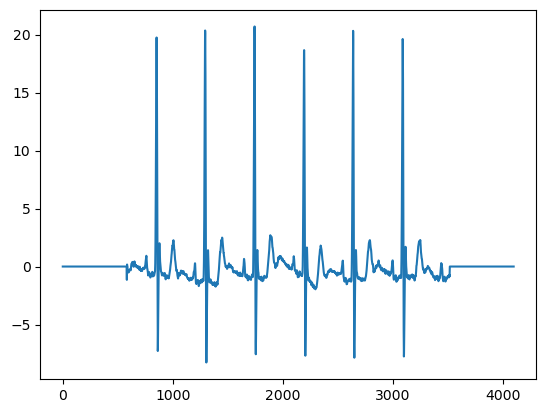

In [15]:
plt.plot(check1[0])

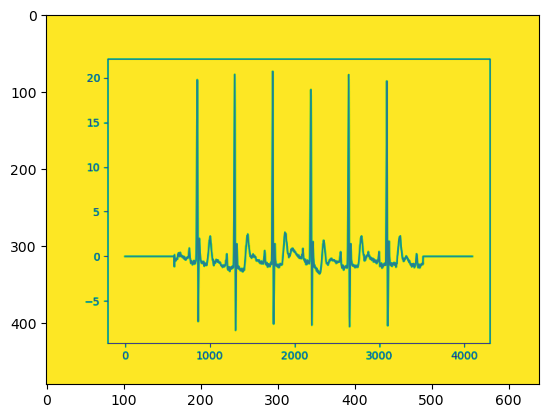

In [11]:
plt.imshow(check[0])